<a href="https://colab.research.google.com/github/oyjuffer/DL-Final/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [16]:
from google.colab import drive
drive.mount('/content/drive')

# dataset directory.
data_dir= "/content/drive/MyDrive/FER-2013/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_dir= "emotion-detection-fer/"

In [13]:
image_size = 384
batch_size = 60

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir + "train/",
  image_size=(image_size, image_size),
  batch_size=batch_size,
  color_mode='rgb')

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir + "test/",
  image_size=(image_size, image_size),
  batch_size=batch_size,
  color_mode='rgb')

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [6]:
class_names = val_ds.class_names
print(class_names)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


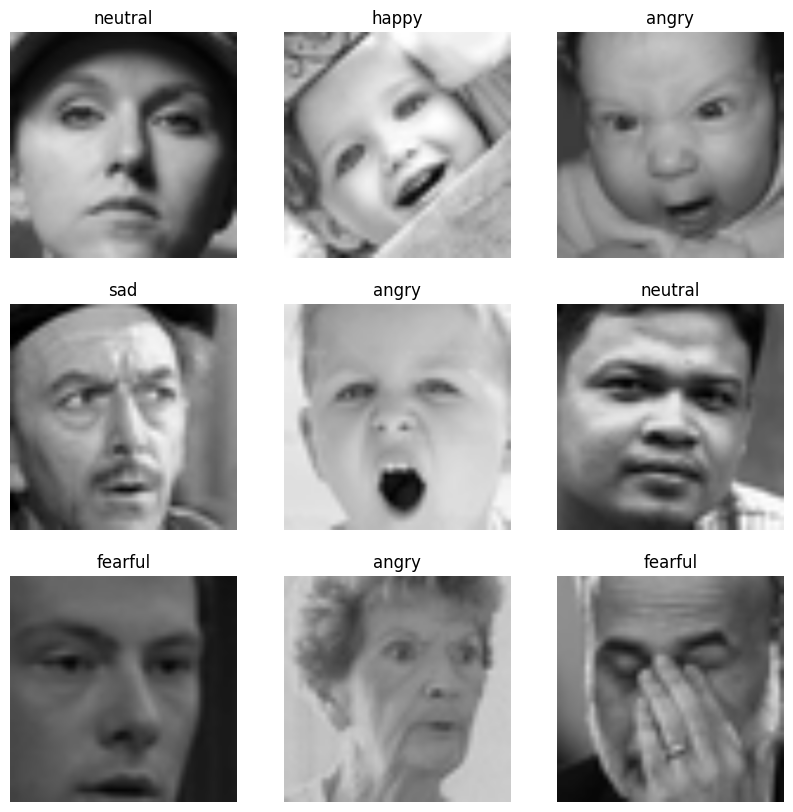

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
# Transfer from efficientnetv2-xl-21k
# https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2

# model_image_size: 384

model_handle = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2"
model_image_size = 384

In [15]:
do_fine_tuning = False
num_classes = len(class_names)

model = Sequential([
  tf.keras.layers.InputLayer(input_shape=(model_image_size, model_image_size, 3,)),
  hub.KerasLayer(model_handle, trainable=do_fine_tuning),
  tf.keras.layers.Dropout(rate=0.2),
  layers.Dense(num_classes)
])

In [16]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [17]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
 23/479 [>.............................] - ETA: 54:05 - loss: 2913.9707 - accuracy: 0.1732

KeyboardInterrupt: 